https://linuxtut.com/en/00fc33722d68627c467d/

In [5]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

width = 28
nskip = 35

mnist = fetch_openml("mnist_784", version=1)

X, y = mnist["data"], mnist["target"]

In [7]:
mnist_img = X.iloc[::nskip, :]
mnist_label = y.iloc[::nskip]
mnist_int = np.asarray(mnist_label, dtype=int)

In [8]:
mnist_label.shape

(2000,)

In [9]:
x_embedded = TSNE(n_components=2, init='random', learning_rate=200.0).fit_transform(mnist_img)

C:\Program Files\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Program Files\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


width is the width of the image. nskip is the sample lottery probability (the reciprocal of). As it is, the sample size is 70,000, which is too much for plotting, so set it to 1/35 and use 2000 samples.

Details of other sequences are as follows.

    mnist_img: (2000, 784) An array of dimensional double precision floating point numbers. Raw image data, stored with pixel values from 0 to 255.
    mnist_label: (2000,) An array of dimensions. Numeric labels are stored as character strings.
    mnist_int: (2000,) An array of dimensions. An integer type of mnist_label.

## Ordinary plot

Probably the second most straightforward plot.

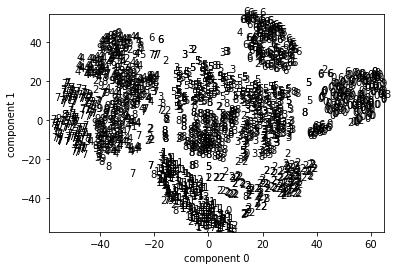

In [10]:
plt.xlim(x_embedded[:, 0].min(), x_embedded[:, 0].max())
plt.ylim(x_embedded[:, 1].min(), x_embedded[:, 1].max())
for x, label in zip(x_embedded, mnist_label):
    plt.text(x[0], x[1], label)
plt.xlabel("component 0")
plt.ylabel("component 1")
plt.show()

The idea of plotting numbers https://qiita.com/stfate/items/8988d01aad9596f9d586 Relied on.

If you use scatter obediently, the range of x and y axes will be adjusted automatically. Due to the method of placing text at each point, you can adjust xlim and ylim yourself. Must be. However, you can see at a glance that groups are formed for each number, and sometimes other numbers are mixed like noise.

Look at this

    After all, I want to make the points just points. If the numbers overlap, it becomes difficult to understand.
    However, it is troublesome to follow the color of dots and the correspondence between colors and numbers.
    Then, if you move the cursor to the point you care about, you can display the details.


## Annotation display by mouse over

I found the answer on Stackoverflow.

https://stackoverflow.com/questions/7908636/possible-to-make-labels-appear-when-hovering-over-a-point-in-matplotlib

Change this code for this MNIST.

In [ ]:
fig, ax = plt.subplots()
cmap = plt.cm.RdYlGn

sc = plt.scatter(x_embedded[:, 0], x_embedded[:, 1], c=mnist_int/10.0, cmap=cmap, s=3)
annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                bbox=dict(boxstyle="round", fc="w"),
                arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)
def update_annot(ind):
    i = ind["ind"][0]
    pos = sc.get_offsets()[i]
    annot.xy = pos
    text = mnist_label[i]
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor(cmap(int(text)/10))

def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()
